<a href="https://colab.research.google.com/github/ibe-abu-chi/python_EDA/blob/master/Airline_satisfaction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [38]:
pip install --upgrade scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [39]:
pip install --upgrade mlxtend

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, plot_confusion_matrix, plot_roc_curve, confusion_matrix
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.ensemble import AdaBoostClassifier
from mlxtend.classifier import EnsembleVoteClassifier
from mlxtend.plotting import plot_decision_regions
import matplotlib.gridspec as gridspec
import itertools
import eli5
from eli5.sklearn import PermutationImportance
import statsmodels.api as sm
import time
import warnings
warnings.filterwarnings("ignore")

In [41]:
df = pd.read_csv('/content/airline_passenger_satisfaction.csv')

In [42]:
df. head(10)

,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,...,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
0,1,Male,48,First-time,Business,Business,821,2,5.0,3,...,3,5,2,5,5,5,3,5,5,Neutral or Dissatisfied
1,2,Female,35,Returning,Business,Business,821,26,39.0,2,...,5,4,5,5,3,5,2,5,5,Satisfied
2,3,Male,41,Returning,Business,Business,853,0,0.0,4,...,3,5,3,5,5,3,4,3,3,Satisfied
3,4,Male,50,Returning,Business,Business,1905,0,0.0,2,...,5,5,5,4,4,5,2,5,5,Satisfied
4,5,Female,49,Returning,Business,Business,3470,0,1.0,3,...,3,4,4,5,4,3,3,3,3,Satisfied
5,6,Male,43,Returning,Business,Business,3788,0,0.0,4,...,4,4,4,3,3,4,4,4,4,Satisfied
6,7,Male,43,Returning,Business,Business,1963,0,0.0,3,...,5,5,5,4,5,5,3,5,5,Satisfied
7,8,Female,60,Returning,Business,Business,853,0,3.0,3,...,3,4,4,4,4,3,4,3,3,Satisfied
8,9,Male,50,Returning,Business,Business,2607,0,0.0,1,...,4,3,4,3,3,4,4,4,4,Neutral or Dissatisfied
9,10,Female,38,Returning,Business,Business,2822,13,0.0,2,...,5,4,5,4,2,5,2,5,5,Satisfied


In [43]:
df.shape

(129880, 24)

In [44]:
df.dtypes

ID                                          int64
Gender                                     object
Age                                         int64
Customer Type                              object
Type of Travel                             object
Class                                      object
Flight Distance                             int64
Departure Delay                             int64
Arrival Delay                             float64
Departure and Arrival Time Convenience      int64
Ease of Online Booking                      int64
Check-in Service                            int64
Online Boarding                             int64
Gate Location                               int64
On-board Service                            int64
Seat Comfort                                int64
Leg Room Service                            int64
Cleanliness                                 int64
Food and Drink                              int64
In-flight Service                           int64


In [45]:
df.columns = [c.replace(' ', '_') for c in df.columns]

In [46]:
# filling missing value using fillna() 
df.fillna(0)

,ID,Gender,Age,Customer_Type,Type_of_Travel,Class,Flight_Distance,Departure_Delay,Arrival_Delay,Departure_and_Arrival_Time_Convenience,...,On-board_Service,Seat_Comfort,Leg_Room_Service,Cleanliness,Food_and_Drink,In-flight_Service,In-flight_Wifi_Service,In-flight_Entertainment,Baggage_Handling,Satisfaction
0,1,Male,48,First-time,Business,Business,821,2,5.0,3,...,3,5,2,5,5,5,3,5,5,Neutral or Dissatisfied
1,2,Female,35,Returning,Business,Business,821,26,39.0,2,...,5,4,5,5,3,5,2,5,5,Satisfied
2,3,Male,41,Returning,Business,Business,853,0,0.0,4,...,3,5,3,5,5,3,4,3,3,Satisfied
3,4,Male,50,Returning,Business,Business,1905,0,0.0,2,...,5,5,5,4,4,5,2,5,5,Satisfied
4,5,Female,49,Returning,Business,Business,3470,0,1.0,3,...,3,4,4,5,4,3,3,3,3,Satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,129876,Male,28,Returning,Personal,Economy Plus,447,2,3.0,4,...,5,1,4,4,4,5,4,4,4,Neutral or Dissatisfied
129876,129877,Male,41,Returning,Personal,Economy Plus,308,0,0.0,5,...,5,2,5,2,2,4,3,2,5,Neutral or Dissatisfied
129877,129878,Male,42,Returning,Personal,Economy Plus,337,6,14.0,5,...,3,3,4,3,3,4,2,3,5,Neutral or Dissatisfied
129878,129879,Male,50,Returning,Personal,Economy Plus,337,31,22.0,4,...,4,4,5,3,3,4,5,3,5,Satisfied


In [47]:

df = df.drop('ID', axis=1)

In [48]:
# Imputing missing value with mean - Train and Test
df['Arrival_Delay'] = df['Arrival_Delay'].fillna(df['Arrival_Delay'].mean())

In [49]:
df.columns

Index(['Gender', 'Age', 'Customer_Type', 'Type_of_Travel', 'Class',
       'Flight_Distance', 'Departure_Delay', 'Arrival_Delay',
       'Departure_and_Arrival_Time_Convenience', 'Ease_of_Online_Booking',
       'Check-in_Service', 'Online_Boarding', 'Gate_Location',
       'On-board_Service', 'Seat_Comfort', 'Leg_Room_Service', 'Cleanliness',
       'Food_and_Drink', 'In-flight_Service', 'In-flight_Wifi_Service',
       'In-flight_Entertainment', 'Baggage_Handling', 'Satisfaction'],
      dtype='object')

In [50]:
a = df.groupby(['Satisfaction'])['Satisfaction'].count().reset_index(name='Total')
a['Percent(%)'] = a.Total/len(df) * 100
a

,Satisfaction,Total,Percent(%)
0,Neutral or Dissatisfied,73452,56.553742
1,Satisfied,56428,43.446258


ITS SEEN HERE THAT 43.4% OF CUSTOMERS ARE SATISFIED WHILE 56.6% ARE NEUTRAL OR DISATISFIED

In [51]:
a = df.groupby(['Satisfaction'])['Satisfaction'].count().reset_index(name='Total')
a['Percent(%)'] = a.Total/len(df) * 100
a

,Satisfaction,Total,Percent(%)
0,Neutral or Dissatisfied,73452,56.553742
1,Satisfied,56428,43.446258


Text(0.5, 1.0, 'SATISFACTION BY CUSTOMER TYPE AND TRAVEL TYPE')

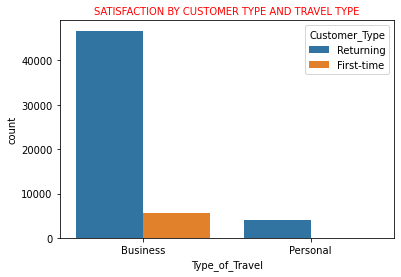

In [52]:
sns.countplot(data=df.loc[df['Satisfaction'] =='Satisfied'], x ='Type_of_Travel', hue ='Customer_Type')
plt.title('SATISFACTION BY CUSTOMER TYPE AND TRAVEL TYPE', color='r', fontsize='medium')

In [53]:
a = df.groupby(['Type_of_Travel', 'Customer_Type'])['Satisfaction'].count().reset_index(name='Total')
a['Percent(%)'] = a.Total/len(df) * 100
a

,Type_of_Travel,Customer_Type,Total,Percent(%)
0,Business,First-time,23579,18.154450
1,Business,Returning,66114,50.903911
2,Personal,First-time,201,0.154758
3,Personal,Returning,39986,30.786880


In [54]:
a = df.groupby(['Satisfaction', 'Type_of_Travel', 'Customer_Type', 'Gender'])['Satisfaction'].count().reset_index(name='Total')
a['Percent(%)'] = a.Total/len(df) * 100
a

,Satisfaction,Type_of_Travel,Customer_Type,Gender,Total,Percent(%)
0,Neutral or Dissatisfied,Business,First-time,Female,9809,7.552356
1,Neutral or Dissatisfied,Business,First-time,Male,8102,6.238066
2,Neutral or Dissatisfied,Business,Returning,Female,9762,7.516169
3,Neutral or Dissatisfied,Business,Returning,Male,9664,7.440715
4,Neutral or Dissatisfied,Personal,First-time,Female,84,0.064675
5,Neutral or Dissatisfied,Personal,First-time,Male,85,0.065445
6,Neutral or Dissatisfied,Personal,Returning,Female,17975,13.839698
7,Neutral or Dissatisfied,Personal,Returning,Male,17971,13.836618
8,Satisfied,Business,First-time,Female,2935,2.259778
9,Satisfied,Business,First-time,Male,2733,2.104250


In [55]:
df.columns = [c.replace(' ', '_') for c in df.columns]

In [56]:
df['Satisfaction'].replace({'neutral or dissatisfied': 1, 'satisfied': 0},inplace = True)

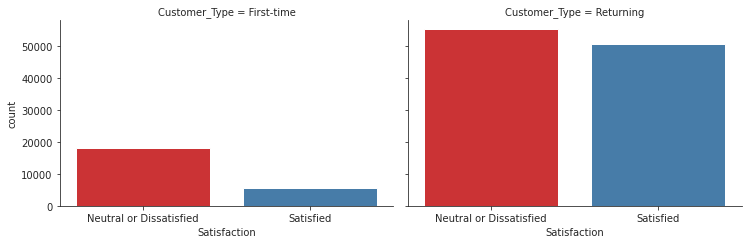

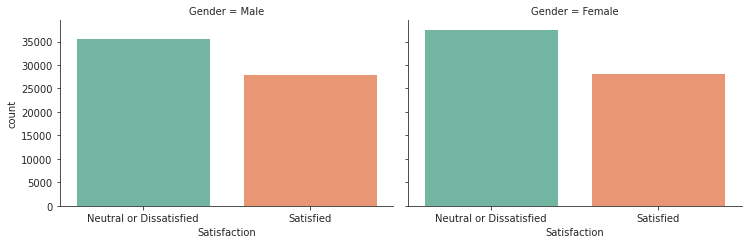

In [57]:
# Gender and Customer type
with sns.axes_style(style='ticks'):
    g = sns.catplot("Satisfaction", col="Customer_Type", col_wrap=2, data=df, kind="count", height=3.5, aspect=1.5, palette = 'Set1')

    g = sns.catplot("Satisfaction", col="Gender", col_wrap=2, data=df, kind="count", height=3.5, aspect=1.5, palette= 'Set2')

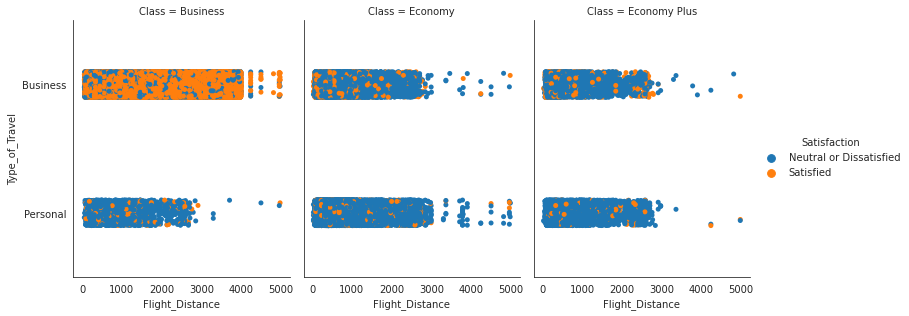

In [58]:
# Type_of_Travel and Flight_Distance by Class
with sns.axes_style('white'):
    g = sns.catplot(x="Flight_Distance", y="Type_of_Travel", hue="Satisfaction", col="Class", data=df, height=4.5, aspect=.8)


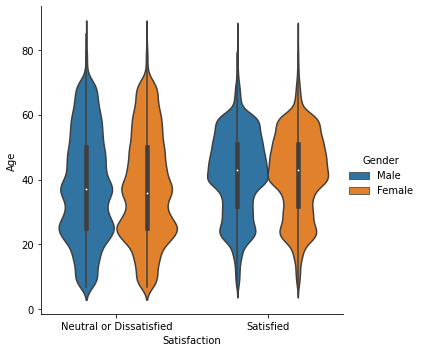

In [59]:
sns.catplot(y = "Age", data=df, x ='Satisfaction', hue = 'Gender', kind = 'violin')

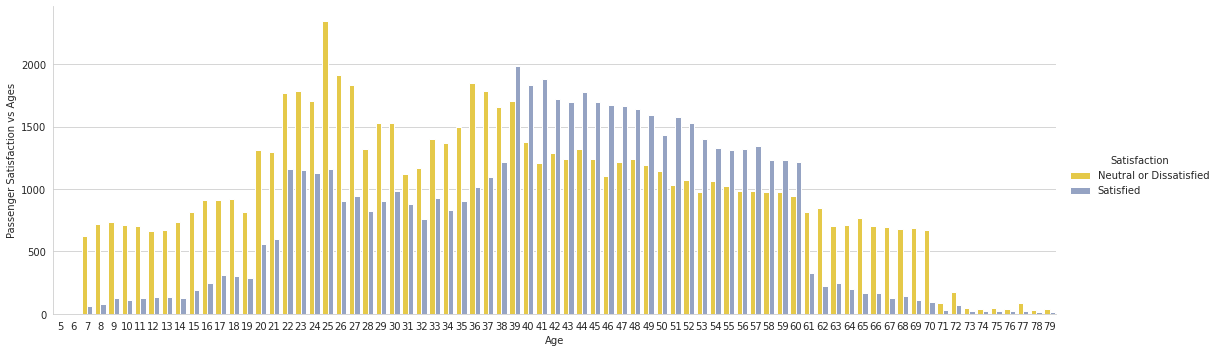

In [60]:

with sns.axes_style('whitegrid'):
    g = sns.catplot("Age", data=df, aspect=3.0, kind='count', hue='Satisfaction', palette = 'Set2_r', order=range(5, 80))
    g.set_ylabels('Passenger Satisfaction vs Ages')

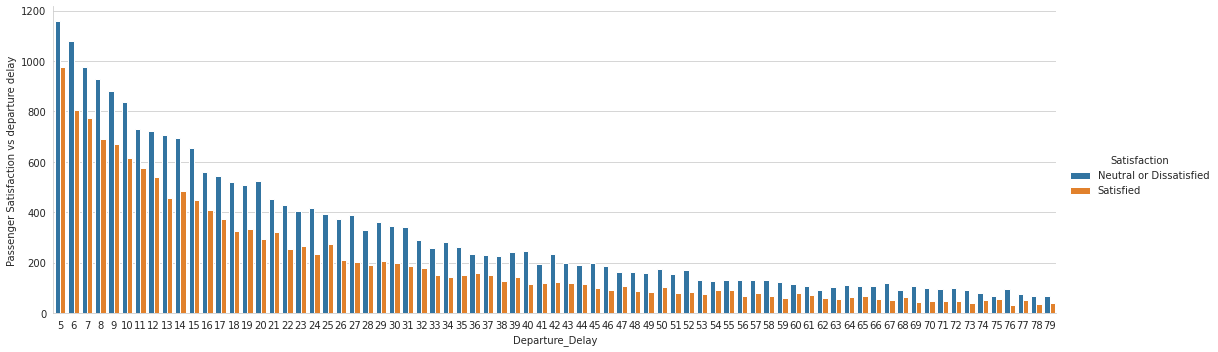

In [61]:
with sns.axes_style('whitegrid'):
    g = sns.catplot("Departure_Delay", data=df, aspect=3.0, kind='count', hue='Satisfaction', order=range(5, 80))
    g.set_ylabels('Passenger Satisfaction vs departure delay')

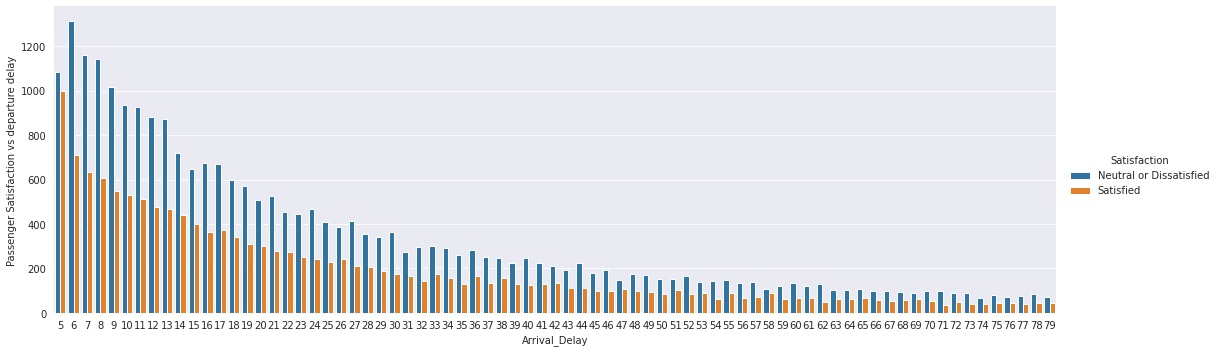

In [62]:
with sns.axes_style('darkgrid'):
    g = sns.catplot('Arrival_Delay', data=df, aspect=3.0, kind='count', hue='Satisfaction', order=range(5, 80))
    g.set_ylabels('Passenger Satisfaction vs departure delay')

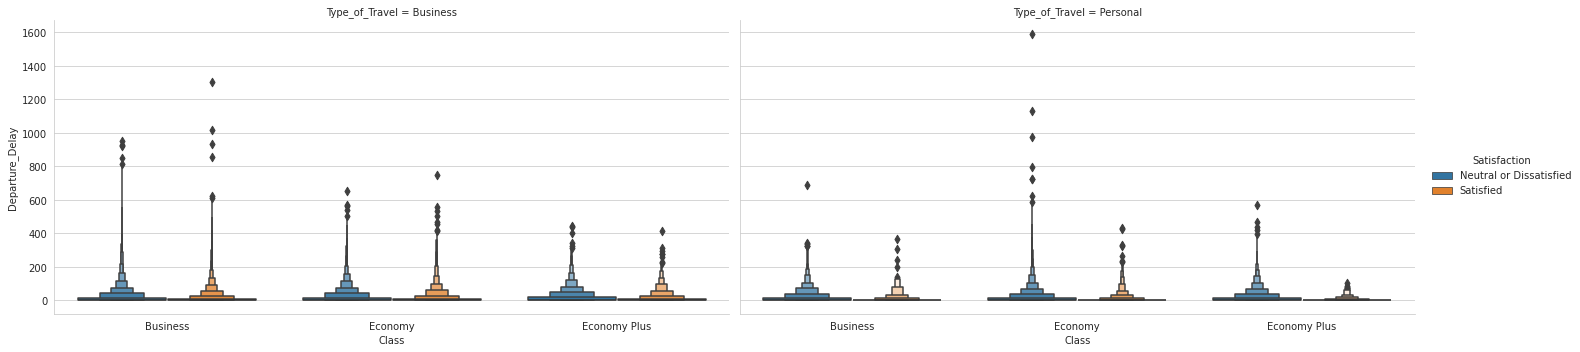

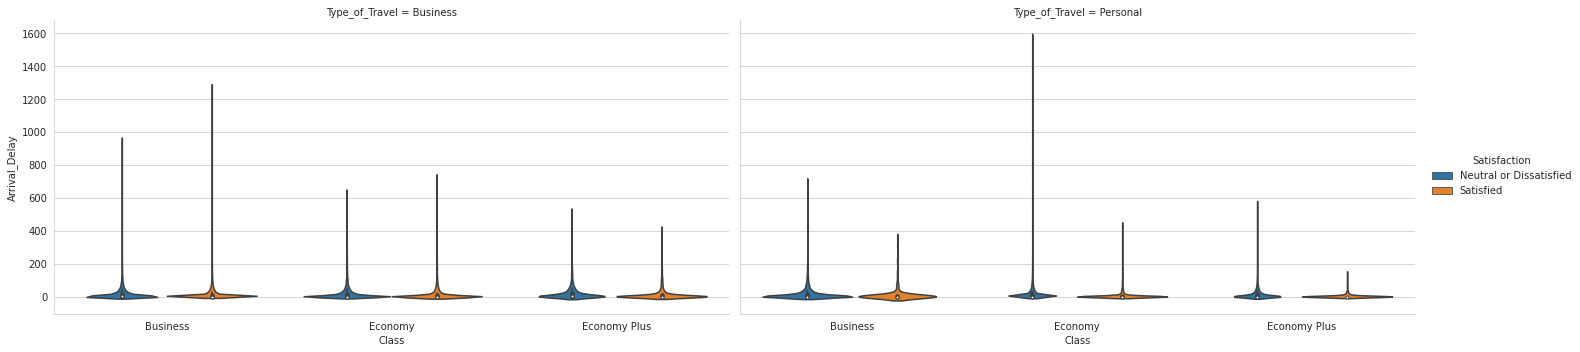

In [63]:

with sns.axes_style('whitegrid'):
    g = sns.catplot(data=df, x="Class", y="Departure_Delay", hue="Satisfaction", col="Type_of_Travel",  kind="boxen", height=5, aspect=2)
    g = sns.catplot(data=df, x="Class", y="Arrival_Delay", hue="Satisfaction", col="Type_of_Travel", kind="violin", height=5, aspect=2)

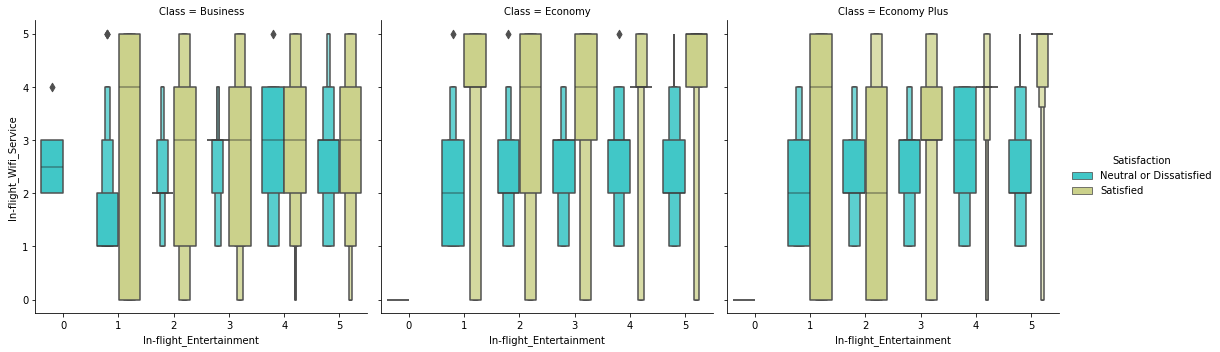

In [64]:
sns.catplot(data=df, x='In-flight_Entertainment', y='In-flight_Wifi_Service', hue="Satisfaction", col="Class", palette = 'rainbow',  kind="boxen")


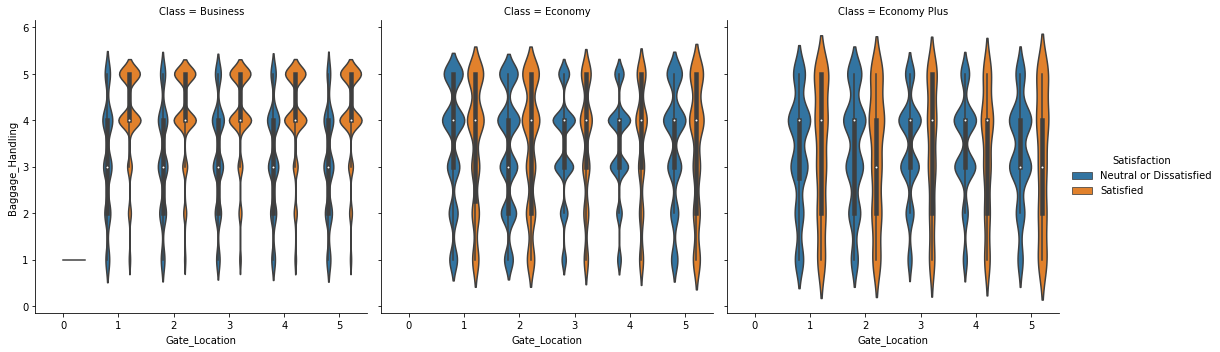

In [65]:
sns.catplot( data=df, x="Gate_Location", y="Baggage_Handling", hue="Satisfaction", col="Class", kind="violin")


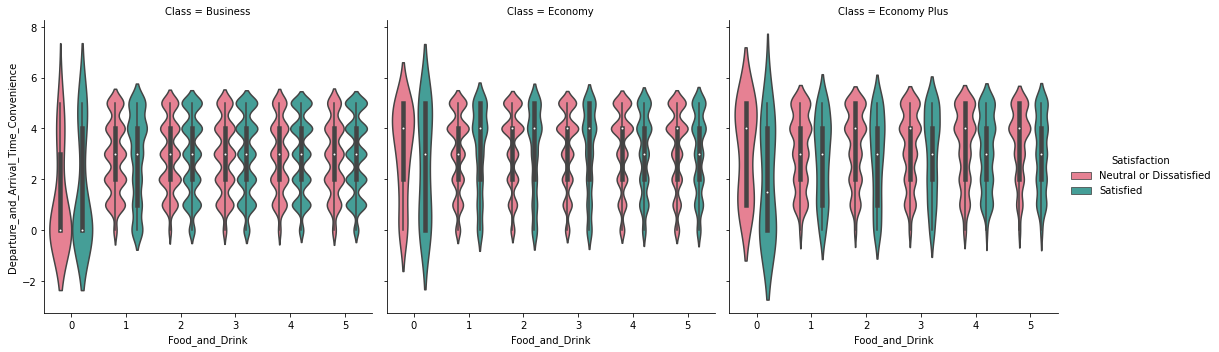

In [66]:
sns.catplot(x="Food_and_Drink", y="Departure_and_Arrival_Time_Convenience", hue = 'Satisfaction', col = 'Class', kind = 'violin', data=df, palette= 'husl')

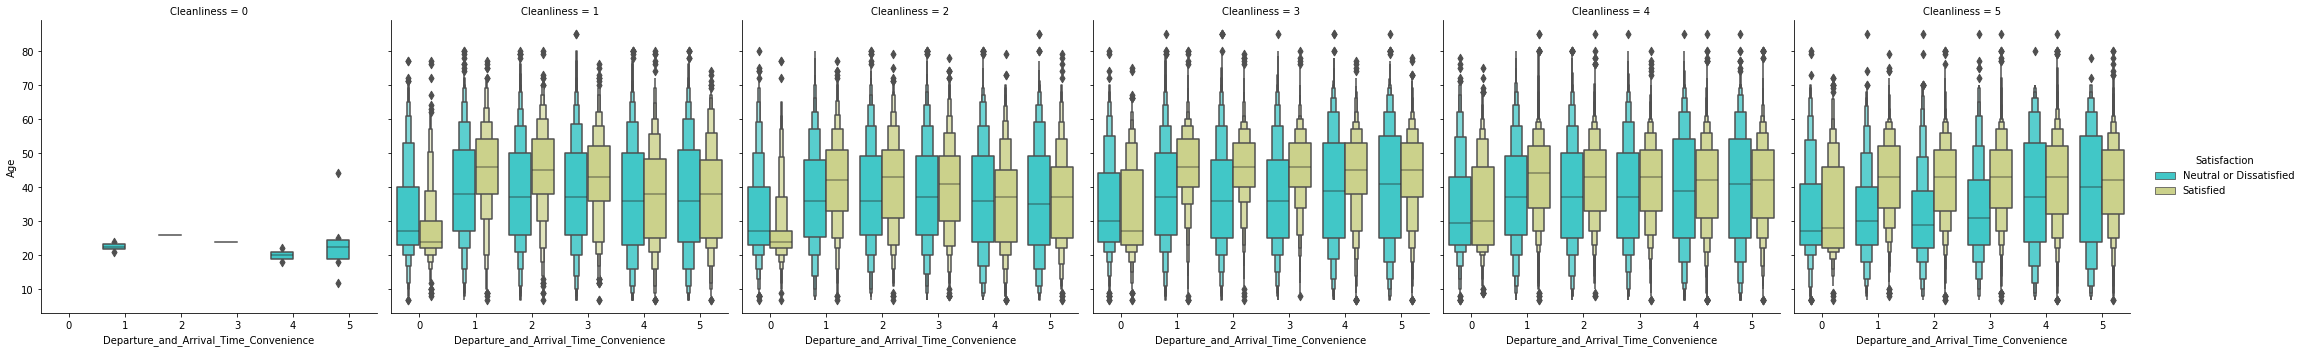

In [67]:

sns.catplot( y = 'Age', x = 'Departure_and_Arrival_Time_Convenience', hue = "Satisfaction", col="Cleanliness", palette = 'rainbow', kind="boxen", data=df)

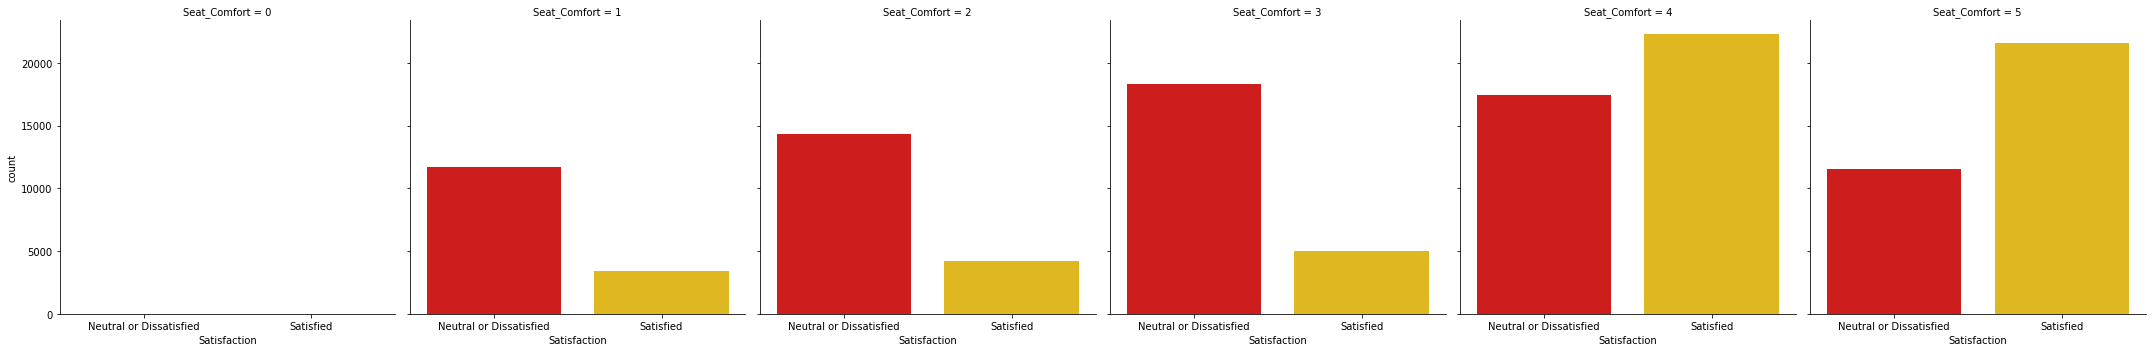

In [68]:
sns.catplot( "Satisfaction", col="Seat_Comfort", data=df, palette = 'hot', kind="count")


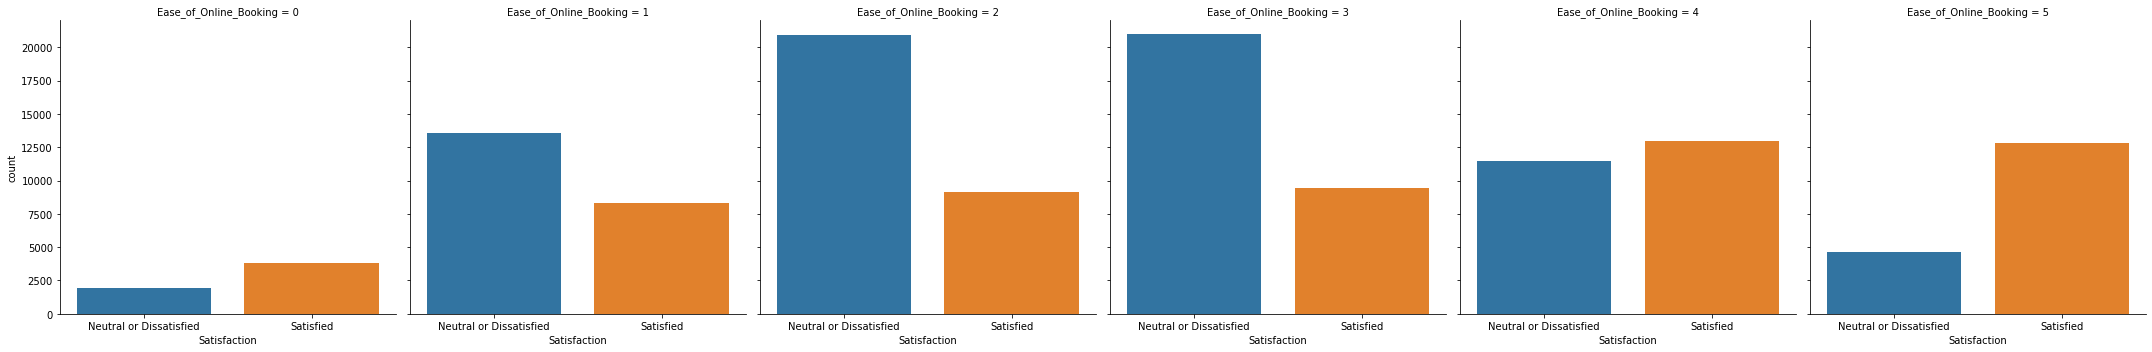

In [69]:
sns.catplot("Satisfaction", col ="Ease_of_Online_Booking", col_wrap=6, data=df, kind="count")

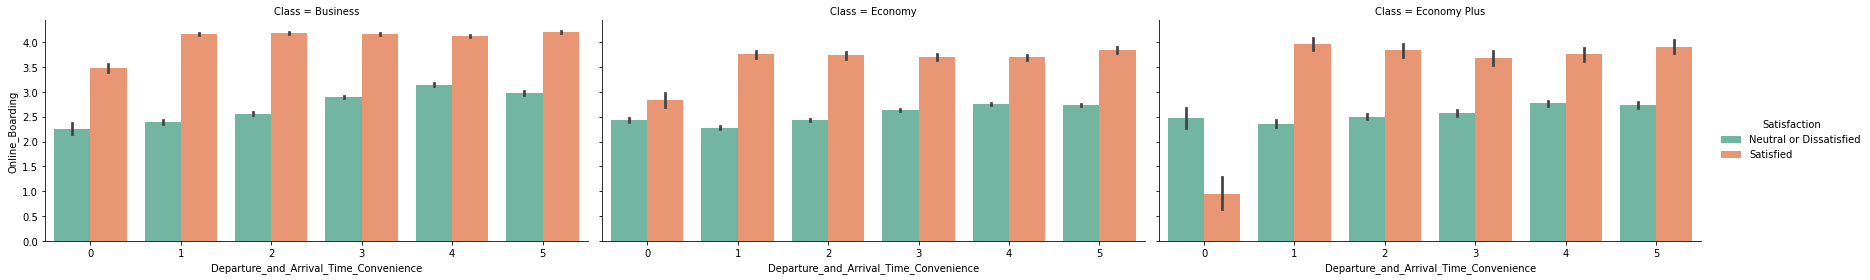

In [70]:
sns.catplot( x="Departure_and_Arrival_Time_Convenience", y="Online_Boarding", hue="Satisfaction", col="Class", data=df, palette = 'Set2', kind="bar", height=4, aspect=2)


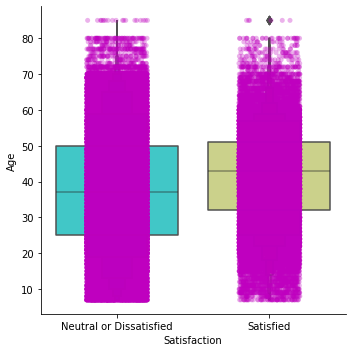

In [71]:
sns.catplot(y = 'Age', x = "Satisfaction", palette = 'rainbow', kind="boxen", data=df)

sns.stripplot(y ='Age', x ='Satisfaction', data=df, alpha=0.3, jitter=0.2, color='m');

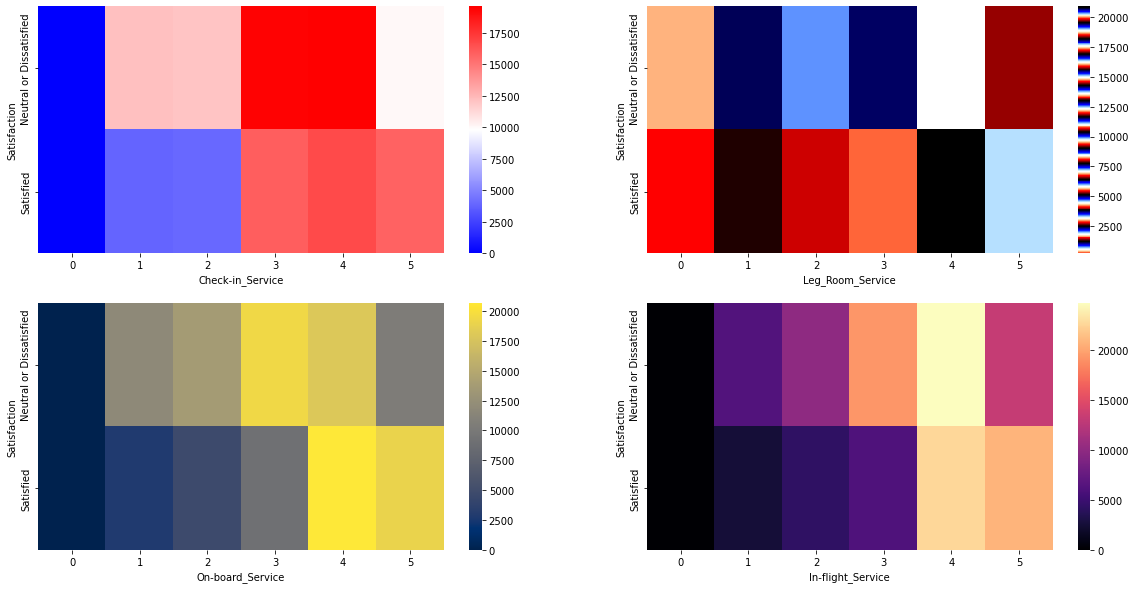

In [72]:
fig, axarr = plt.subplots(2, 2, figsize=(20, 10))

table1 = pd.crosstab(df['Satisfaction'], df['Check-in_Service'])
sns.heatmap(table1, cmap='bwr', ax = axarr[0][0])
table2 = pd.crosstab(df['Satisfaction'], df['Leg_Room_Service'])
sns.heatmap(table2, cmap='flag', ax = axarr[0][1])
table3 = pd.crosstab(df['Satisfaction'], df['On-board_Service'])
sns.heatmap(table3, cmap='cividis', ax = axarr[1][0])
table4 = pd.crosstab(df['Satisfaction'], df['In-flight_Service'])
sns.heatmap(table4, cmap='magma', ax = axarr[1][1])

In [73]:
# For Train set
lencoders = {}
for col in df.select_dtypes(include=['object']).columns:
    lencoders[col] = LabelEncoder()
    df[col] = lencoders[col].fit_transform(df[col])

In [74]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Gender                                       1.0
Age                                         24.0
Customer_Type                                0.0
Type_of_Travel                               1.0
Class                                        1.0
Flight_Distance                           1330.0
Departure_Delay                             12.0
Arrival_Delay                               13.0
Departure_and_Arrival_Time_Convenience       2.0
Ease_of_Online_Booking                       2.0
Check-in_Service                             1.0
Online_Boarding                              2.0
Gate_Location                                2.0
On-board_Service                             2.0
Seat_Comfort                                 3.0
Leg_Room_Service                             2.0
Cleanliness                                  2.0
Food_and_Drink                               2.0
In-flight_Service                            2.0
In-flight_Wifi_Service                       2.0
In-flight_Entertainm

In [75]:
# Removal of outliers from dataset
df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
df.shape

(129880, 23)

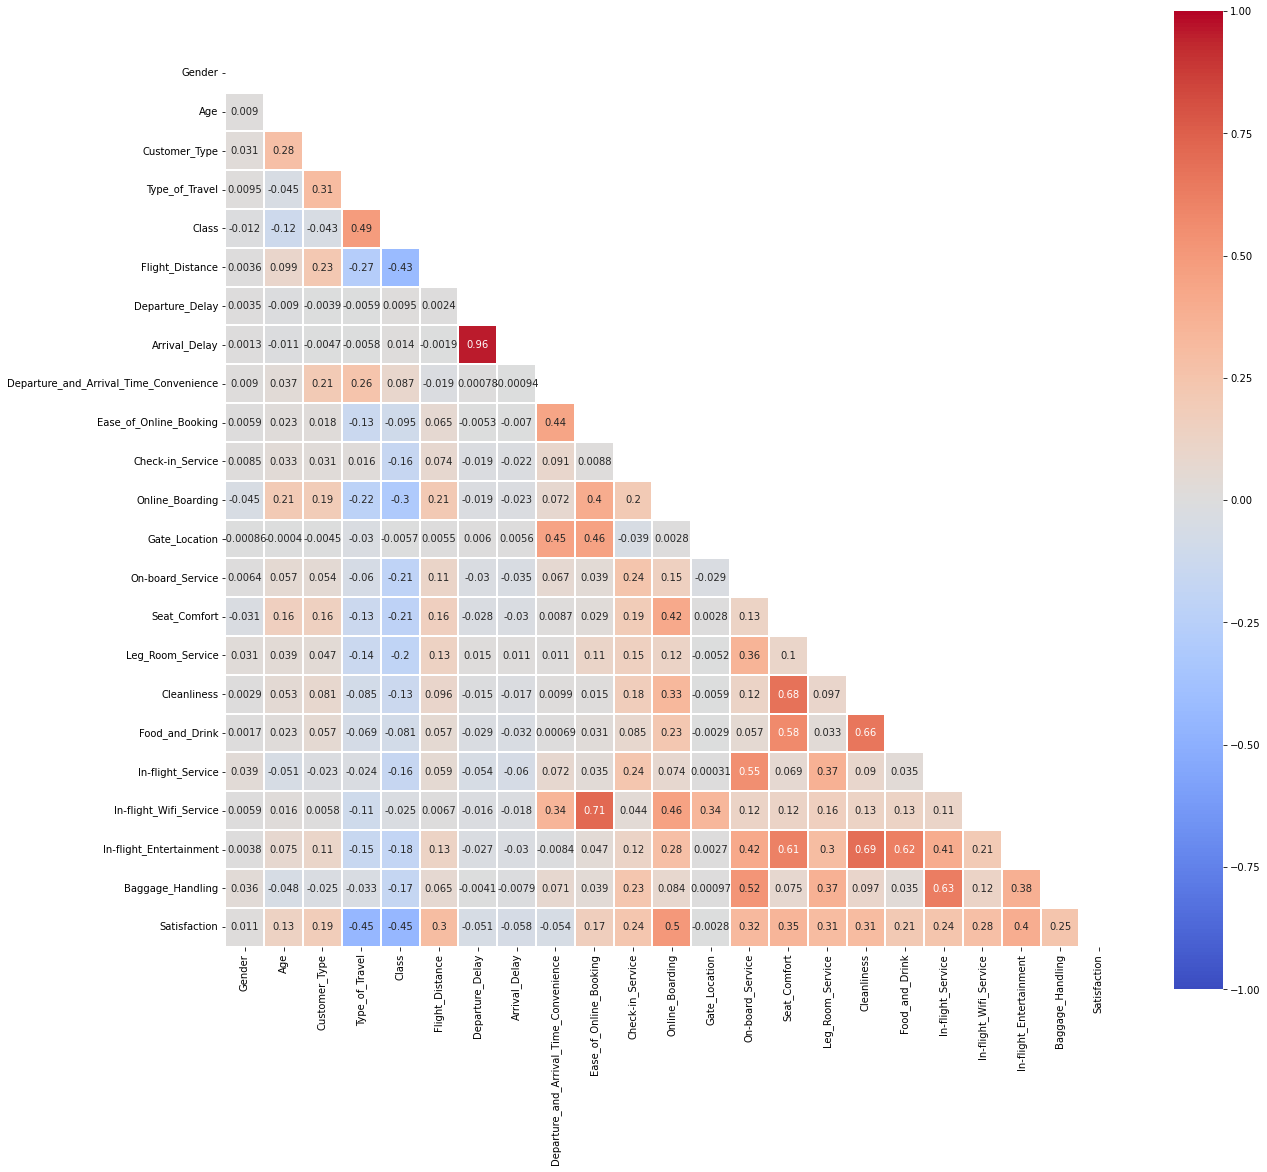

In [76]:
mask = np.triu(np.ones_like(df.corr(), dtype=np.bool))
f, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(df.corr(), mask = mask, cmap = 'coolwarm', vmax = 1, vmin = -1, center = 0, square = True, annot = True, linewidths = 1, cbar_kws={"shrink": .9})


In [77]:
r_scaler = preprocessing.MinMaxScaler()
r_scaler.fit(df)
modified_data = pd.DataFrame(r_scaler.transform(df), columns=df.columns)
modified_data.head()

,Gender,Age,Customer_Type,Type_of_Travel,Class,Flight_Distance,Departure_Delay,Arrival_Delay,Departure_and_Arrival_Time_Convenience,Ease_of_Online_Booking,...,On-board_Service,Seat_Comfort,Leg_Room_Service,Cleanliness,Food_and_Drink,In-flight_Service,In-flight_Wifi_Service,In-flight_Entertainment,Baggage_Handling,Satisfaction
0,1.0,0.525641,0.0,0.0,0.0,0.159532,0.001256,0.003157,0.6,0.6,...,0.6,1.0,0.4,1.0,1.0,1.0,0.6,1.0,1.0,0.0
1,0.0,0.358974,1.0,0.0,0.0,0.159532,0.016332,0.024621,0.4,0.4,...,1.0,0.8,1.0,1.0,0.6,1.0,0.4,1.0,1.0,1.0
2,1.0,0.435897,1.0,0.0,0.0,0.165994,0.000000,0.000000,0.8,0.8,...,0.6,1.0,0.6,1.0,1.0,0.6,0.8,0.6,0.5,1.0
3,1.0,0.551282,1.0,0.0,0.0,0.378433,0.000000,0.000000,0.4,0.4,...,1.0,1.0,1.0,0.8,0.8,1.0,0.4,1.0,1.0,1.0
4,0.0,0.538462,1.0,0.0,0.0,0.694467,0.000000,0.000631,0.6,0.6,...,0.6,0.8,0.8,1.0,0.8,0.6,0.6,0.6,0.5,1.0


In [78]:
X = modified_data.loc[:,modified_data.columns!='Satisfaction']
y = modified_data[['Satisfaction']]
selector = SelectKBest(chi2, k=10)
selector.fit(X, y)
X_new = selector.transform(X)
print(X.columns[selector.get_support(indices=True)])

Index(['Type_of_Travel', 'Class', 'Flight_Distance', 'Online_Boarding',
       'On-board_Service', 'Seat_Comfort', 'Leg_Room_Service', 'Cleanliness',
       'In-flight_Wifi_Service', 'In-flight_Entertainment'],
      dtype='object')


In [81]:
X = df.drop('Satisfaction', axis=1)
y = df['Satisfaction']
selector = SelectFromModel(RandomForestClassifier(n_estimators=100, random_state=0))
selector.fit(X, y)
support = selector.get_support()
features = X.loc[:,support].columns.tolist()
print(features)
print(RandomForestClassifier(n_estimators=100, random_state=0).fit(X,y).feature_importances_)

['Type_of_Travel', 'Class', 'Online_Boarding', 'In-flight_Wifi_Service', 'In-flight_Entertainment']
[0.00426784 0.03278614 0.03681682 0.09879136 0.09349549 0.03363146
 0.01085657 0.01220506 0.01491059 0.03913184 0.02369419 0.16820709
 0.01704138 0.0260339  0.04403748 0.0429025  0.02544012 0.01091562
 0.0215315  0.1486708  0.07177246 0.0228598 ]


In [83]:
perm = PermutationImportance(RandomForestClassifier(n_estimators=100, random_state=0).fit(X,y),random_state=1).fit(X,y)
eli5.show_weights(perm, feature_names = X.columns.tolist())

Weight,Feature
0.1563 ± 0.0017,In-flight_Wifi_Service
0.1377 ± 0.0010,Type_of_Travel
0.0563 ± 0.0008,Customer_Type
0.0452 ± 0.0005,Online_Boarding
0.0300 ± 0.0009,Check-in_Service
0.0288 ± 0.0007,Class
0.0259 ± 0.0004,Baggage_Handling
0.0243 ± 0.0002,Seat_Comfort
0.0213 ± 0.0009,Cleanliness
0.0213 ± 0.0004,In-flight_Service


In [84]:
X = df[['Type_of_Travel','In-flight_Wifi_Service','Online_Boarding','Seat_Comfort','Flight_Distance', 'In-flight_Entertainment','On-board_Service','Leg_Room_Service',
        'Cleanliness','Check-in_Service', 'In-flight_Service', 'Baggage_Handling', 'Gender', 'Age']]
y = df['Satisfaction']

# Split into test and train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= .3, random_state=1)

# Normalize Features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [85]:
def run_model(model, X_train, y_train, X_test, y_test, verbose=True):
    t0=time.time()
    if verbose == False:
        model.fit(X_train,y_train.ravel(), verbose=0)
    else:
        model.fit(X_train,y_train.ravel())
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred) 
    time_taken = time.time()-t0
    print("Accuracy = {}".format(accuracy))
    print("ROC Area under Curve = {}".format(roc_auc))
    print("Time taken = {}".format(time_taken))
    print(classification_report(y_test,y_pred,digits=5))
    plot_confusion_matrix(model, X_test, y_test,cmap=plt.cm.pink, normalize = 'all')
    plot_roc_curve(model, X_test, y_test)                     
    
    return model, accuracy, roc_auc, time_taken

Accuracy = 0.8567138897443795
ROC Area under Curve = 0.8523262929913913
Time taken = 0.905841588973999
              precision    recall  f1-score   support

           0    0.86491   0.88533   0.87500     22072
           1    0.84540   0.81932   0.83216     16892

    accuracy                        0.85671     38964
   macro avg    0.85516   0.85233   0.85358     38964
weighted avg    0.85645   0.85671   0.85643     38964



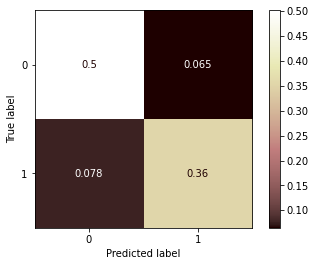

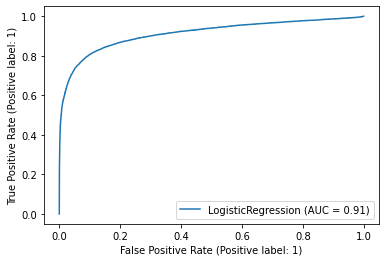

In [86]:
# Logistic Regression penalized with Elastic Net (L1 penalty = 50%, L2 penalty = 50%)

params_lr = {'penalty': 'elasticnet', 'l1_ratio':0.5, 'solver': 'saga'}

model_lr = LogisticRegression(**params_lr)
model_lr, accuracy_lr, roc_auc_lr, tt_lr = run_model(model_lr, X_train, y_train, X_test, y_test)

In [87]:
logit_model=sm.Logit(y_train,X_train)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.386764
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:           Satisfaction   No. Observations:                90916
Model:                          Logit   Df Residuals:                    90902
Method:                           MLE   Df Model:                           13
Date:                Sat, 05 Nov 2022   Pseudo R-squ.:                  0.4351
Time:                        03:09:22   Log-Likelihood:                -35163.
converged:                       True   LL-Null:                       -62244.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -1.0346      0.011    -98.060      0.000      -1.055      -1.014
x2             0.1504      0.

In [88]:
#LINEAR REGRESSION
regr = LogisticRegression()
regr.fit(X, y)

# with statsmodels
x = sm.add_constant(X) # adding a constant
 
log_reg = sm.Logit(y, X).fit()
predictions = log_reg.predict(X) 
 
print_log_reg = log_reg.summary()
print(print_log_reg)

Optimization terminated successfully.
         Current function value: 0.486457
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:           Satisfaction   No. Observations:               129880
Model:                          Logit   Df Residuals:                   129866
Method:                           MLE   Df Model:                           13
Date:                Sat, 05 Nov 2022   Pseudo R-squ.:                  0.2894
Time:                        03:09:26   Log-Likelihood:                -63181.
converged:                       True   LL-Null:                       -88907.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Type_of_Travel             -2.6257      0.019   -136.560      0.000      -2.663   

In [89]:
#LINEAR REGRESSION
regr = LinearRegression()
regr.fit(X, y)

# with statsmodels
x = sm.add_constant(X) # adding a constant
 
lin_reg = sm.OLS(y, X).fit()
predictions = lin_reg.predict(X) 
 
print_lin_reg = lin_reg.summary()
print(print_lin_reg)

                                 OLS Regression Results                                
Dep. Variable:           Satisfaction   R-squared (uncentered):                   0.683
Model:                            OLS   Adj. R-squared (uncentered):              0.683
Method:                 Least Squares   F-statistic:                          2.002e+04
Date:                Sat, 05 Nov 2022   Prob (F-statistic):                        0.00
Time:                        03:09:27   Log-Likelihood:                         -55465.
No. Observations:              129880   AIC:                                  1.110e+05
Df Residuals:                  129866   BIC:                                  1.111e+05
Df Model:                          14                                                  
Covariance Type:            nonrobust                                                  
                              coef    std err          t      P>|t|      [0.025      0.975]
----------------------------

Accuracy = 0.8546093830202238
ROC Area under Curve = 0.850197815566166
Time taken = 0.07666277885437012
              precision    recall  f1-score   support

           0    0.86316   0.88338   0.87316     22072
           1    0.84281   0.81701   0.82971     16892

    accuracy                        0.85461     38964
   macro avg    0.85299   0.85020   0.85143     38964
weighted avg    0.85434   0.85461   0.85432     38964



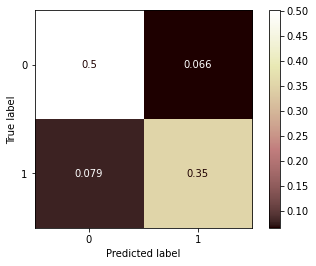

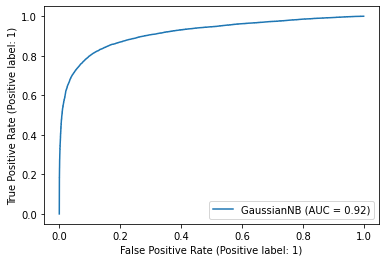

In [90]:
#Naive Bayes Classifier
params_nb = {}

model_nb = GaussianNB(**params_nb)

model_nb, accuracy_nb, roc_auc_nb, tt_nb = run_model(model_nb, X_train, y_train, X_test, y_test)

Accuracy = 0.9180782260548198
ROC Area under Curve = 0.9100605303788252
Time taken = 27.52673625946045
              precision    recall  f1-score   support

           0    0.89406   0.97037   0.93065     22072
           1    0.95642   0.84975   0.89994     16892

    accuracy                        0.91808     38964
   macro avg    0.92524   0.91006   0.91529     38964
weighted avg    0.92109   0.91808   0.91734     38964



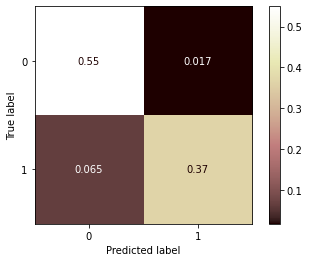

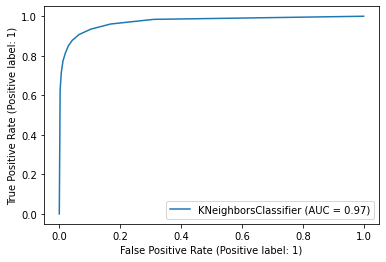

In [91]:
#K-Nearest Neighbor Classifier
params_kn = {'n_neighbors':10, 'algorithm': 'kd_tree', 'n_jobs':4}

model_kn = KNeighborsClassifier(**params_kn)

model_kn, accuracy_kn, roc_auc_kn, tt_kn = run_model(model_kn, X_train, y_train, X_test, y_test)

Accuracy = 0.9198747561851965
ROC Area under Curve = 0.9153835611900071
Time taken = 0.13248825073242188
              precision    recall  f1-score   support

           0    0.91285   0.94917   0.93066     22072
           1    0.92994   0.88160   0.90512     16892

    accuracy                        0.91987     38964
   macro avg    0.92140   0.91538   0.91789     38964
weighted avg    0.92026   0.91987   0.91959     38964



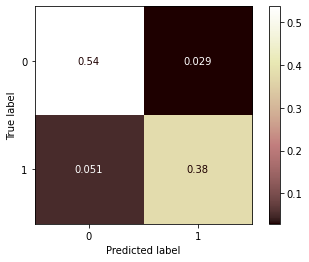

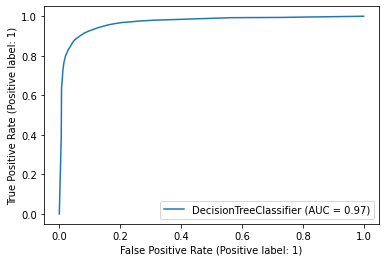

In [92]:
#Decision Tree Classifier
params_dt = {'max_depth': 12, 'max_features': "sqrt"}

model_dt = DecisionTreeClassifier(**params_dt)

model_dt, accuracy_dt, roc_auc_dt, tt_dt = run_model(model_dt, X_train, y_train, X_test, y_test)

Accuracy = 0.9287804126886356
ROC Area under Curve = 0.9261965361333974
Time taken = 58.809823513031006
              precision    recall  f1-score   support

           0    0.92983   0.94563   0.93767     22072
           1    0.92735   0.90676   0.91694     16892

    accuracy                        0.92878     38964
   macro avg    0.92859   0.92620   0.92730     38964
weighted avg    0.92876   0.92878   0.92868     38964



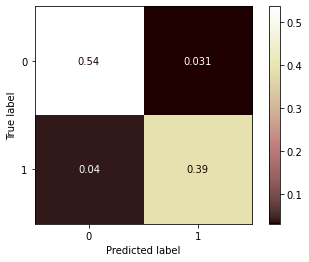

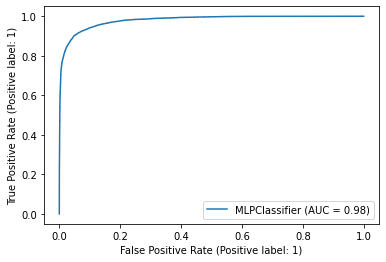

In [93]:
# Neural Network (Multilayer Perceptron)
params_nn = {'hidden_layer_sizes': (30,30,30), 'activation': 'logistic', 'solver': 'lbfgs', 'max_iter': 100}

model_nn = MLPClassifier(**params_nn)

model_nn, accuracy_nn, roc_auc_nn, tt_nn = run_model(model_nn, X_train, y_train, X_test, y_test)

Accuracy = 0.9525202751257571
ROC Area under Curve = 0.9496098092677897
Time taken = 9.588383674621582
              precision    recall  f1-score   support

           0    0.94613   0.97150   0.95865     22072
           1    0.96141   0.92772   0.94426     16892

    accuracy                        0.95252     38964
   macro avg    0.95377   0.94961   0.95145     38964
weighted avg    0.95275   0.95252   0.95241     38964



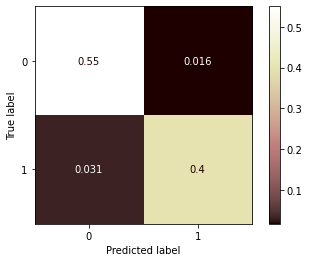

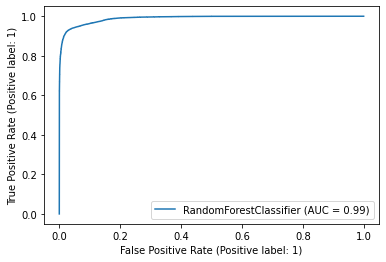

In [94]:
#Random Forest
params_rf = {'max_depth': 16, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100, 'random_state': 12345}

model_rf = RandomForestClassifier(**params_rf)

model_rf, accuracy_rf, roc_auc_rf, tt_rf = run_model(model_rf, X_train, y_train, X_test, y_test)

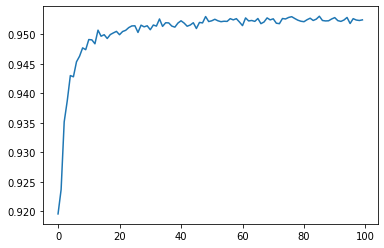

In [95]:
%matplotlib inline

trees=range(100)
accuracy=np.zeros(100)

for i in range(len(trees)):
    clf = RandomForestClassifier(n_estimators = i+1)
    model1 = clf.fit(X_train, y_train.ravel())
    y_predictions = model1.predict(X_test)
    accuracy[i] = accuracy_score(y_test, y_predictions)

plt.plot(trees,accuracy)

Accuracy = 0.9502617801047121
ROC Area under Curve = 0.9478664136839484
Time taken = 174.97061252593994
              precision    recall  f1-score   support

           0    0.94734   0.96588   0.95652     22072
           1    0.95425   0.92985   0.94189     16892

    accuracy                        0.95026     38964
   macro avg    0.95080   0.94787   0.94921     38964
weighted avg    0.95034   0.95026   0.95018     38964



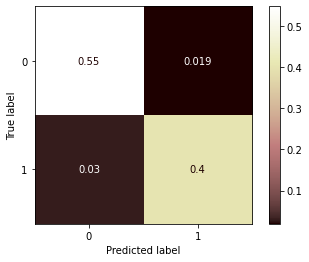

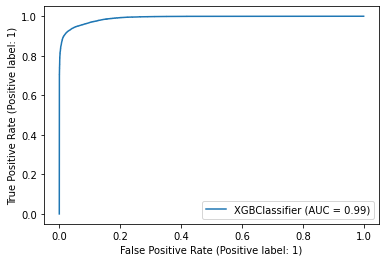

In [96]:
#Extreme Gradient Boosting
params_xgb ={'n_estimators': 500, 'max_depth': 16}

model_xgb = xgb.XGBClassifier(**params_xgb)

model_xgb, accuracy_xgb, roc_auc_xgb, tt_xgb = run_model(model_xgb, X_train, y_train, X_test, y_test)

Accuracy = 0.9133815829996921
ROC Area under Curve = 0.9108054660969199
Time taken = 38.490612745285034
              precision    recall  f1-score   support

           0    0.91800   0.93018   0.92405     22072
           1    0.90716   0.89143   0.89923     16892

    accuracy                        0.91338     38964
   macro avg    0.91258   0.91081   0.91164     38964
weighted avg    0.91330   0.91338   0.91329     38964



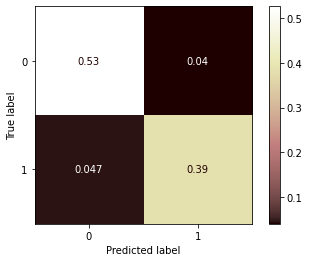

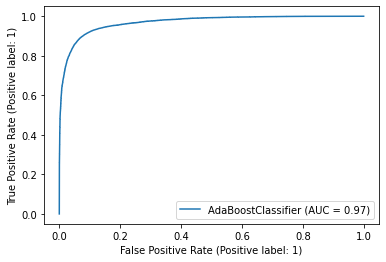

In [97]:
#Adaptive Gradient Boosting
params_adab ={'n_estimators': 500, 'random_state': 12345}

model_adab = AdaBoostClassifier(**params_adab)

model_adab, accuracy_adab, roc_auc_adab, tt_adab = run_model(model_adab, X_train, y_train, X_test, y_test)

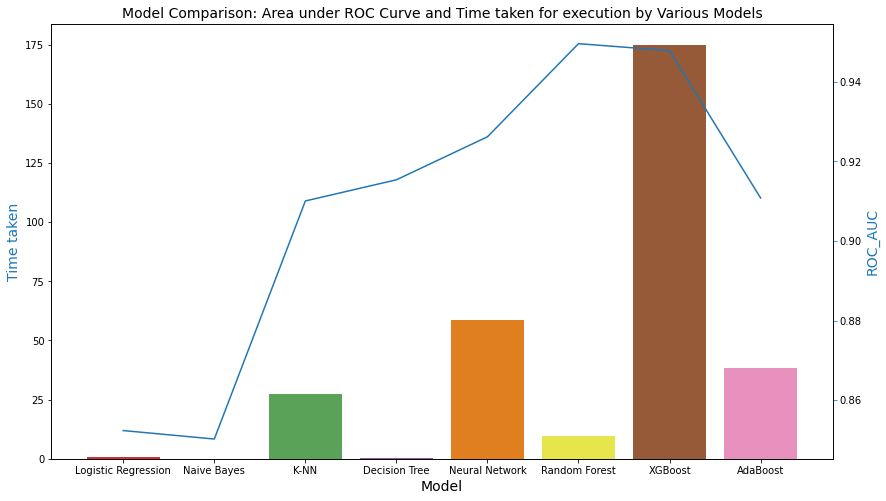

In [101]:
#Model Comparison
#Comparing the performances of the above models with respect to their ROC_AUC score and total time taken for execution.

roc_auc_scores = [roc_auc_lr, roc_auc_nb, roc_auc_kn, roc_auc_dt, roc_auc_nn, roc_auc_rf, roc_auc_xgb, roc_auc_adab]
tt = [tt_lr, tt_nb, tt_kn, tt_dt, tt_nn, tt_rf, tt_xgb, tt_adab]

model_data = {'Model': ['Logistic Regression','Naive Bayes','K-NN','Decision Tree','Neural Network','Random Forest','XGBoost','AdaBoost'],
              'ROC_AUC': roc_auc_scores, 'Time taken': tt}

data = pd.DataFrame(model_data)

fig, ax1 = plt.subplots(figsize=(14,8))
ax1.set_title('Model Comparison: Area under ROC Curve and Time taken for execution by Various Models', fontsize=14)
color = 'tab:blue'
ax1.set_xlabel('Model', fontsize=14)
ax1.set_ylabel('Time taken', fontsize=14, color=color)
ax2 = sns.barplot(x='Model', y='Time taken', data = data, palette='Set1')
ax1.tick_params(axis='y')
ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('ROC_AUC', fontsize=14, color=color)
ax2 = sns.lineplot(x='Model', y='ROC_AUC', data = data, sort=False, color=color)
ax2.tick_params(axis='y', color=color)

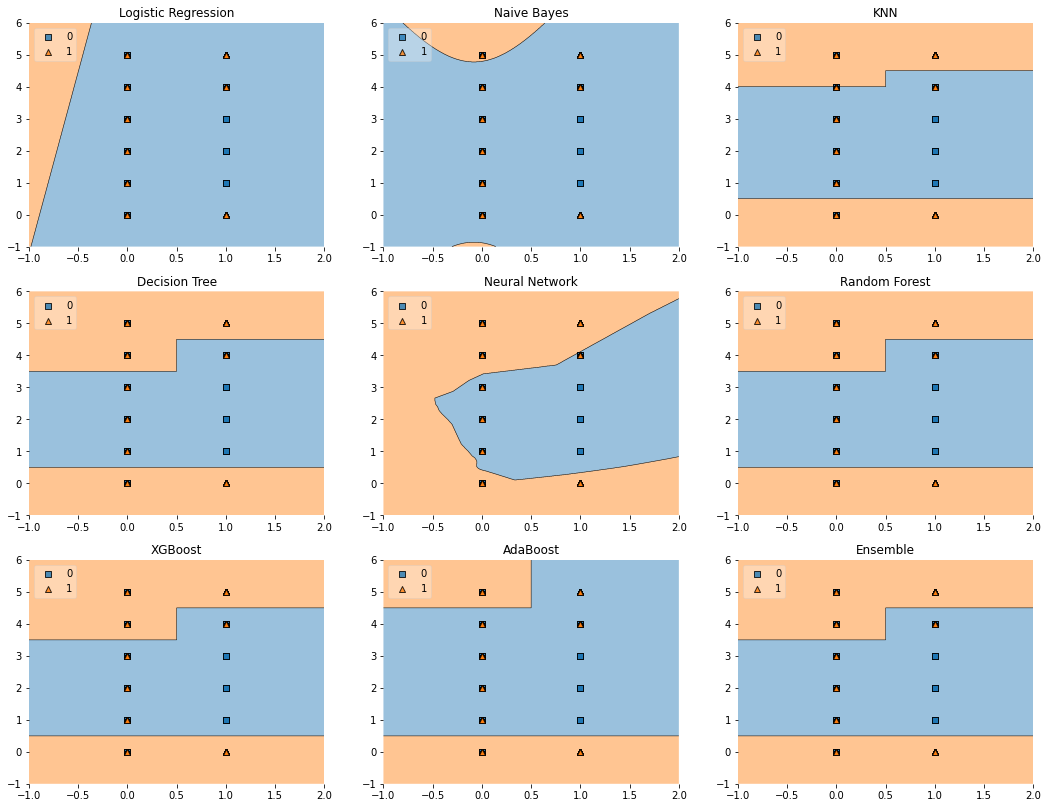

In [98]:
#Decision Region Plotting for Different Models
value = 1.70
width = 0.85

clf1 = LogisticRegression(random_state=12345)
clf2 = GaussianNB()
clf3 = KNeighborsClassifier()
clf4 = DecisionTreeClassifier(random_state=12345) 
clf5 = MLPClassifier(random_state=12345, verbose = 0)
clf6 = RandomForestClassifier(random_state=12345)
clf7 = xgb.XGBClassifier(random_state=12345)
clf8 = AdaBoostClassifier(random_state=12345)
eclf = EnsembleVoteClassifier(clfs=[clf6, clf7, clf8], weights=[1, 1, 1], voting='soft')

# Considering only the most important features
X_list = df[["Type_of_Travel", "In-flight_Wifi_Service", "Online_Boarding", "Seat_Comfort"]]
X = np.asarray(X_list, dtype=np.float32)
y_list = df["Satisfaction"]
y = np.asarray(y_list, dtype=np.int32)

# Decision Regions Plotting
gs = gridspec.GridSpec(3,3)
fig = plt.figure(figsize=(18, 14))

labels = ['Logistic Regression', 'Naive Bayes', 'KNN', 'Decision Tree', 'Neural Network', 'Random Forest', 'XGBoost', 'AdaBoost', 'Ensemble']

for clf, lab, grd in zip([clf1, clf2, clf3, clf4, clf5, clf6, clf7, clf8, eclf], labels, itertools.product([0, 1, 2], repeat=2)):
    clf.fit(X, y)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X, y=y, clf=clf, filler_feature_values={2: value, 3: value}, filler_feature_ranges={2: width, 3: width}, legend=2)
    plt.title(lab)

In [ ]:
#Decision Region Plotting for Different Models
value = 1.70
width = 0.85

clf0 = LinearRegression()
clf1 = LogisticRegression(random_state=12345)
clf2 = GaussianNB()
clf3 = KNeighborsClassifier()
clf4 = DecisionTreeClassifier(random_state=12345) 
clf5 = MLPClassifier(random_state=12345, verbose = 0)
clf6 = RandomForestClassifier(random_state=12345)
clf7 = xgb.XGBClassifier(random_state=12345)
clf8 = AdaBoostClassifier(random_state=12345)
eclf = EnsembleVoteClassifier(clfs=[clf6, clf7, clf8], weights=[1, 1, 1], voting='soft')

# Considering only the most important features
X_list = df[['Type_of_Travel','In-flight_Wifi_Service','Online_Boarding','Seat_Comfort','Flight_Distance']]
X = np.asarray(X_list, dtype=np.float32)
y_list = df["Satisfaction"]
y = np.asarray(y_list, dtype=np.int32)

# Decision Regions Plotting
gs = gridspec.GridSpec(4,3)
fig = plt.figure(figsize=(18, 14))

labels = ['Logistic Regression', 'Naive Bayes', 'KNN', 'Decision Tree', 'Neural Network', 'Random Forest', 'XGBoost', 'AdaBoost', 'Ensemble']

for clf, lab, grd in zip([clf0,clf1, clf2, clf3, clf4, clf5, clf6, clf7, clf8, eclf], labels, itertools.product([0, 1, 2], repeat=2)):
    clf.fit(X, y)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X, y=y, clf=clf, filler_feature_values={2:value, 3:value, 4:value}, filler_feature_ranges={2: width, 3: width, 4:width}, legend=2)
    plt.title(lab)

In [100]:
import numpy as np
%matplotlib inline

trees=range(100)
accuracy=np.zeros(100)

for i in range(len(trees)):
    clf = RandomForestClassifier(n_estimators = i+1)
    model1 = clf.fit(X_train, y_train.ravel())
    y_predictions = model1.predict(X_test)
    accuracy[i] = accuracy_score(y_test, y_predictions)

plt.plot(trees,accuracy)

KeyboardInterrupt: ignored

In [ ]:
df.columns